In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-multimodal-image-ct-and-mri/Dataset/Brain Tumor MRI images/MRI image source.txt
/kaggle/input/brain-tumor-multimodal-image-ct-and-mri/Dataset/Brain Tumor MRI images/Tumor/tumor (243).jpg
/kaggle/input/brain-tumor-multimodal-image-ct-and-mri/Dataset/Brain Tumor MRI images/Tumor/meningioma (1062).jpg
/kaggle/input/brain-tumor-multimodal-image-ct-and-mri/Dataset/Brain Tumor MRI images/Tumor/pituitary (205).jpg
/kaggle/input/brain-tumor-multimodal-image-ct-and-mri/Dataset/Brain Tumor MRI images/Tumor/meningioma (95).jpg
/kaggle/input/brain-tumor-multimodal-image-ct-and-mri/Dataset/Brain Tumor MRI images/Tumor/tumor (14).jpeg
/kaggle/input/brain-tumor-multimodal-image-ct-and-mri/Dataset/Brain Tumor MRI images/Tumor/glioma (123).jpg
/kaggle/input/brain-tumor-multimodal-image-ct-and-mri/Dataset/Brain Tumor MRI images/Tumor/tumor (281).jpg
/kaggle/input/brain-tumor-multimodal-image-ct-and-mri/Dataset/Brain Tumor MRI images/Tumor/glioma (498).jpg
/kaggle/input/brain-tu

In [3]:
base_path = "/kaggle/input/brain-tumor-multimodal-image-ct-and-mri/Dataset/Brain Tumor CT scan Images/"
categories = ["Healthy","Tumor"]

In [4]:
image_paths = []
labels = []

for category in categories:
    category_path = os.path.join(base_path, category)
    for image_name in os.listdir(category_path):
        image_path = os.path.join(category_path, image_name)
        image_paths.append(image_path)
        labels.append(category)  

df = pd.DataFrame({
    "image_path": image_paths,
    "label": labels
})

In [5]:
df.head()

,image_path,label
0,/kaggle/input/brain-tumor-multimodal-image-ct-...,Healthy
1,/kaggle/input/brain-tumor-multimodal-image-ct-...,Healthy
2,/kaggle/input/brain-tumor-multimodal-image-ct-...,Healthy
3,/kaggle/input/brain-tumor-multimodal-image-ct-...,Healthy
4,/kaggle/input/brain-tumor-multimodal-image-ct-...,Healthy


In [6]:
df.tail()

,image_path,label
4613,/kaggle/input/brain-tumor-multimodal-image-ct-...,Tumor
4614,/kaggle/input/brain-tumor-multimodal-image-ct-...,Tumor
4615,/kaggle/input/brain-tumor-multimodal-image-ct-...,Tumor
4616,/kaggle/input/brain-tumor-multimodal-image-ct-...,Tumor
4617,/kaggle/input/brain-tumor-multimodal-image-ct-...,Tumor


In [7]:
df.shape

(4618, 2)

In [8]:
df.columns

Index(['image_path', 'label'], dtype='object')

In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

image_path    0
label         0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4618 entries, 0 to 4617
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  4618 non-null   object
 1   label       4618 non-null   object
dtypes: object(2)
memory usage: 72.3+ KB


In [12]:
df['label'].unique()

array(['Healthy', 'Tumor'], dtype=object)

In [13]:
df['label'].value_counts()

label
Tumor      2318
Healthy    2300
Name: count, dtype: int64

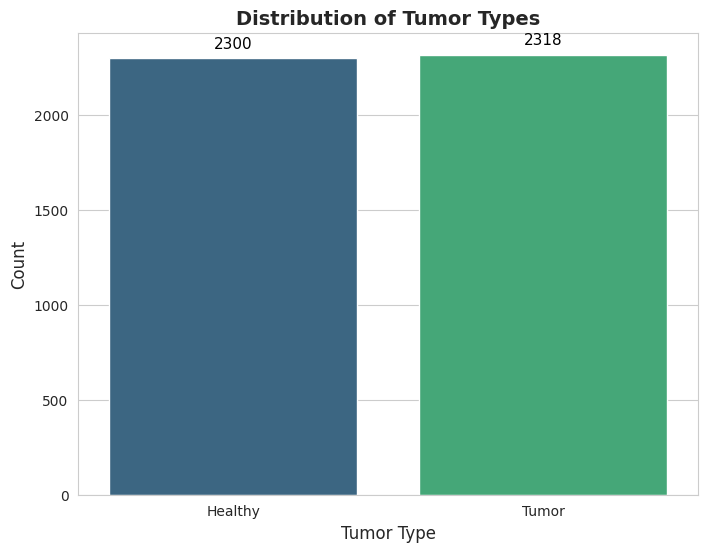

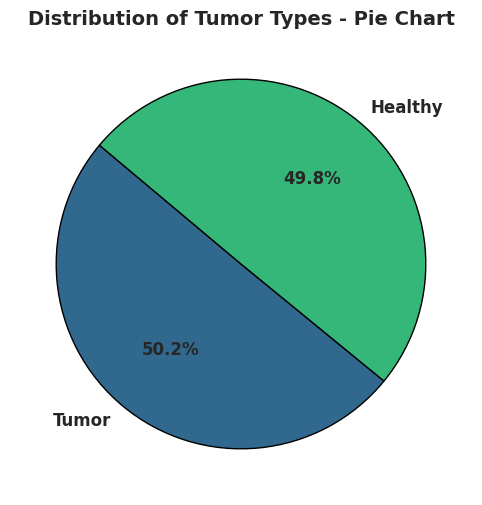

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(data=df, x="label", palette="viridis", ax=ax)

ax.set_title("Distribution of Tumor Types", fontsize=14, fontweight='bold')
ax.set_xlabel("Tumor Type", fontsize=12)
ax.set_ylabel("Count", fontsize=12)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=11, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.show()

label_counts = df["label"].value_counts()

fig, ax = plt.subplots(figsize=(8, 6))
colors = sns.color_palette("viridis", len(label_counts))

ax.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', 
       startangle=140, colors=colors, textprops={'fontsize': 12, 'weight': 'bold'},
       wedgeprops={'edgecolor': 'black', 'linewidth': 1})

ax.set_title("Distribution of Tumor Types - Pie Chart", fontsize=14, fontweight='bold')

plt.show()

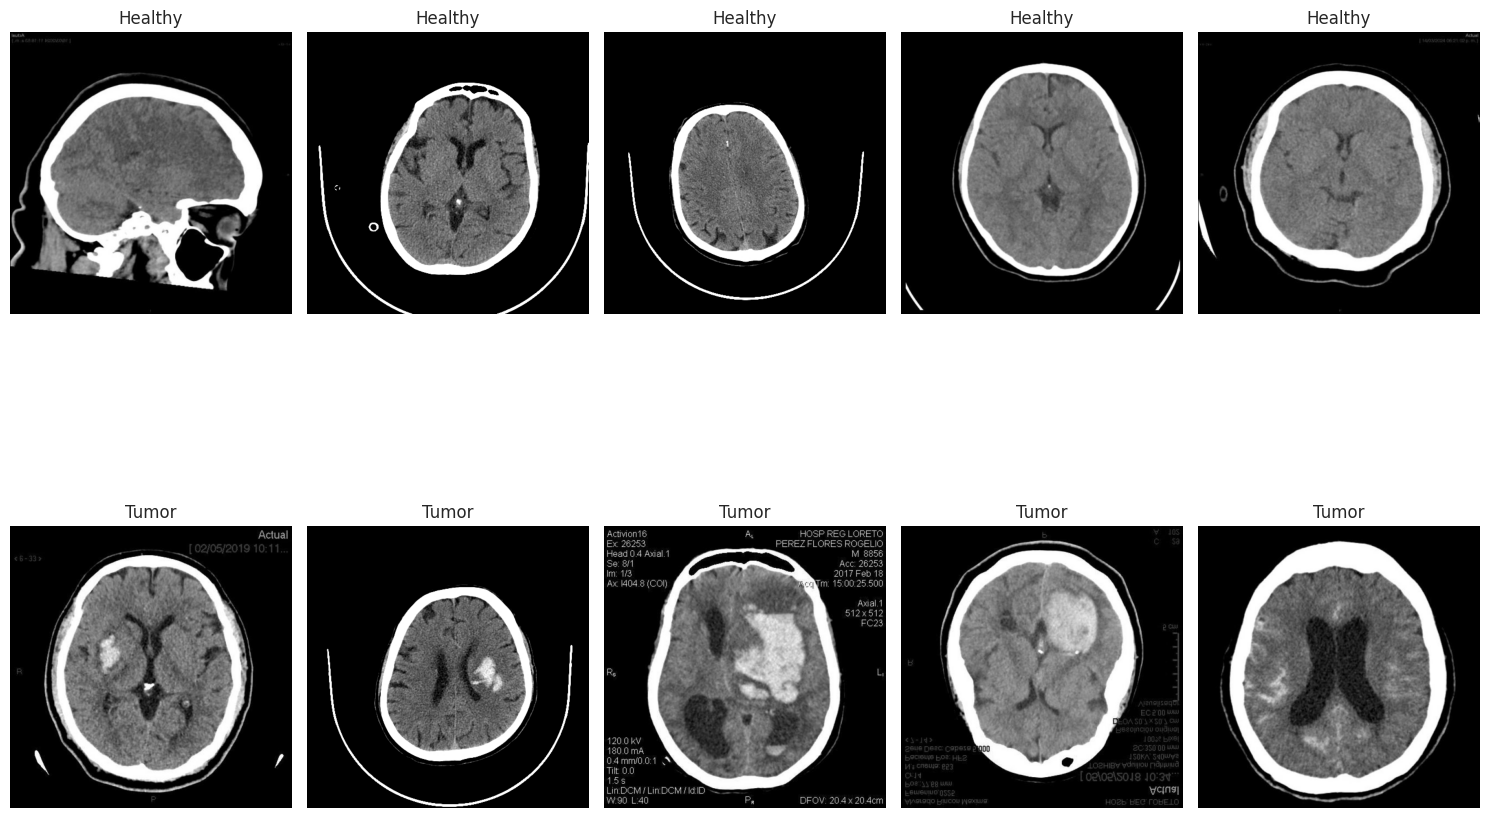

In [15]:
import cv2

num_images = 5

plt.figure(figsize=(15, 12))

for i, category in enumerate(categories):
    category_images = df[df['label'] == category]['image_path'].iloc[:num_images]

    for j, img_path in enumerate(category_images):

        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  

        plt.subplot(len(categories), num_images, i * num_images + j + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(category)

plt.tight_layout()
plt.show()

In [16]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['category_encoded'] = label_encoder.fit_transform(df['label'])

In [17]:
df = df[['image_path', 'category_encoded']]

In [18]:
from imblearn.over_sampling import RandomOverSampler

In [19]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(df[['image_path']], df['category_encoded'])

In [20]:
df_resampled = pd.DataFrame(X_resampled, columns=['image_path'])
df_resampled['category_encoded'] = y_resampled

In [21]:
print("\nClass distribution after oversampling:")
print(df_resampled['category_encoded'].value_counts())


Class distribution after oversampling:
category_encoded
0    2318
1    2318
Name: count, dtype: int64


In [22]:
df_resampled

,image_path,category_encoded
0,/kaggle/input/brain-tumor-multimodal-image-ct-...,0
1,/kaggle/input/brain-tumor-multimodal-image-ct-...,0
2,/kaggle/input/brain-tumor-multimodal-image-ct-...,0
3,/kaggle/input/brain-tumor-multimodal-image-ct-...,0
4,/kaggle/input/brain-tumor-multimodal-image-ct-...,0
...,...,...
4631,/kaggle/input/brain-tumor-multimodal-image-ct-...,0
4632,/kaggle/input/brain-tumor-multimodal-image-ct-...,0
4633,/kaggle/input/brain-tumor-multimodal-image-ct-...,0
4634,/kaggle/input/brain-tumor-multimodal-image-ct-...,0


In [23]:
df_resampled['category_encoded'] = df_resampled['category_encoded'].astype(str)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

import warnings
warnings.filterwarnings("ignore")

print ('check')

check


In [25]:
train_df_new, temp_df_new = train_test_split(
    df_resampled,
    train_size=0.8,  
    shuffle=True,
    random_state=42,
    stratify=df_resampled['category_encoded']  
)

valid_df_new, test_df_new = train_test_split(
    temp_df_new,
    test_size=0.5,  
    shuffle=True,
    random_state=42,
    stratify=temp_df_new['category_encoded'] 
)

In [26]:
batch_size = 16
img_size = (224, 224)
channels = 3  
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator(rescale=1./255)  
ts_gen = ImageDataGenerator(rescale=1./255)

train_gen_new = tr_gen.flow_from_dataframe(
    train_df_new,
    x_col='image_path',  
    y_col='category_encoded',     
    target_size=img_size,
    class_mode='binary',  
    color_mode='rgb', 
    shuffle=True,
    batch_size=batch_size
)

valid_gen_new = ts_gen.flow_from_dataframe(
    valid_df_new,
    x_col='image_path',  
    y_col='category_encoded',     
    target_size=img_size,
    class_mode='binary',  
    color_mode='rgb', 
    shuffle=True,
    batch_size=batch_size
)

test_gen_new = ts_gen.flow_from_dataframe(
    test_df_new,
    x_col='image_path', 
    y_col='category_encoded',    
    target_size=img_size,
    class_mode='binary',  
    color_mode='rgb', 
    shuffle=False,  
    batch_size=batch_size
)

Found 3708 validated image filenames belonging to 2 classes.
Found 464 validated image filenames belonging to 2 classes.
Found 464 validated image filenames belonging to 2 classes.


In [27]:
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [28]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("GPU is set for TensorFlow")
    except RuntimeError as e:
        print(e)

In [29]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SpatialAttentionLayer(nn.Module):
    def __init__(self, in_channels):
        super(SpatialAttentionLayer, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, in_channels // 2, kernel_size=1)
        self.conv2 = nn.Conv2d(in_channels // 2, 1, kernel_size=3, padding=1, dilation=1)
        self.conv3 = nn.Conv2d(1, 1, kernel_size=3, padding=2, dilation=2)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        attention = self.conv1(x)
        attention = F.relu(self.conv2(attention))
        attention = self.sigmoid(self.conv3(attention))
        return x * attention

class CNNBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(CNNBlock, self).__init__()
        self.spatial_attention = SpatialAttentionLayer(in_channels)
        self.conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU()
        )
    
    def forward(self, x):
        x = self.spatial_attention(x)
        return self.conv(x)

class SKIPNet(nn.Module):
    def __init__(self, num_classes=3):
        super(SKIPNet, self).__init__()
        self.block1 = CNNBlock(3, 32)
        self.block2 = CNNBlock(32, 64)
        self.block3 = CNNBlock(64, 128)
        self.dropout = nn.Dropout(0.5)
        self.downsample = nn.Conv2d(128, 128, kernel_size=2, stride=2)
        self.final_attention = SpatialAttentionLayer(128)
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 16 * 16, 256),
            nn.ReLU(),
            nn.Linear(256, num_classes)
        )
    
    def forward(self, x):
        x = self.block1(x)
        x = self.dropout(x)
        x = self.block2(x)
        x = self.dropout(x)
        x = self.block3(x)
        x = self.dropout(x)
        x = self.downsample(x)
        x = self.final_attention(x)
        x = self.fc(x)
        return x

model = SKIPNet(num_classes=3)
print(model)

SKIPNet(
  (block1): CNNBlock(
    (spatial_attention): SpatialAttentionLayer(
      (conv1): Conv2d(3, 1, kernel_size=(1, 1), stride=(1, 1))
      (conv2): Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (conv3): Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2), dilation=(2, 2))
      (sigmoid): Sigmoid()
    )
    (conv): Sequential(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
  )
  (block2): CNNBlock(
    (spatial_attention): SpatialAttentionLayer(
      (conv1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1))
      (conv2): Conv2d(16, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (conv3): Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2), dilation=(2, 2))
      (sigmoid): Sigmoid()
    )
    (conv): Sequential(
      (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), pa

In [30]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

class SpatialAttentionLayer(keras.layers.Layer):
    def __init__(self, **kwargs):
        super(SpatialAttentionLayer, self).__init__(**kwargs)
        self.conv1 = layers.Conv2D(32, kernel_size=1, activation='relu')
        self.conv2 = layers.Conv2D(1, kernel_size=3, padding='same', activation='sigmoid')
    
    def call(self, inputs):
        attention = self.conv1(inputs)
        attention = self.conv2(attention)
        return inputs * attention

class CNNBlock(keras.layers.Layer):
    def __init__(self, filters, **kwargs):
        super(CNNBlock, self).__init__(**kwargs)
        self.spatial_attention = SpatialAttentionLayer()
        self.conv = keras.Sequential([
            layers.Conv2D(filters, kernel_size=3, padding='same', activation='relu'),
            layers.BatchNormalization(),
            layers.ReLU()
        ])
    
    def call(self, inputs):
        x = self.spatial_attention(inputs)
        return self.conv(x)

class SKIPNet(keras.Model):
    def __init__(self, num_classes=2):
        super(SKIPNet, self).__init__()
        self.block1 = CNNBlock(32)
        self.block2 = CNNBlock(64)
        self.block3 = CNNBlock(128)
        self.dropout = layers.Dropout(0.5)
        self.downsample = layers.Conv2D(128, kernel_size=2, strides=2)
        self.final_attention = SpatialAttentionLayer()
        self.flatten = layers.Flatten()
        self.fc1 = layers.Dense(256, activation='relu')
        self.fc2 = layers.Dense(1, activation='sigmoid')
    
    def call(self, inputs):
        x = self.block1(inputs)
        x = self.dropout(x)
        x = self.block2(x)
        x = self.dropout(x)
        x = self.block3(x)
        x = self.dropout(x)
        x = self.downsample(x)
        x = self.final_attention(x)
        x = self.flatten(x)
        x = self.fc1(x)
        return self.fc2(x)

model = SKIPNet(num_classes=2)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.build(input_shape=(None, 224, 224, 3))

In [ ]:
history = model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=5,
    batch_size=16,
    verbose=1
)

Epoch 1/5


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
def plot_history(history):
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')
    plt.show()

plot_history(history)

In [ ]:
y_pred = model.predict(test_gen_new)
y_pred_classes = (y_pred > 0.5).astype(int).flatten()
y_true = test_gen_new.classes

In [ ]:
conf_matrix = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print('Classification Report:\n', classification_report(y_true, y_pred_classes))

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

class SpatialAttentionLayer(keras.layers.Layer):
    def __init__(self, **kwargs):
        super(SpatialAttentionLayer, self).__init__(**kwargs)
        self.conv1 = layers.Conv2D(32, kernel_size=1, activation='relu')
        self.conv2 = layers.Conv2D(1, kernel_size=3, padding='same', activation='sigmoid')

    def call(self, inputs):
        attention = self.conv1(inputs)
        attention = self.conv2(attention)
        return inputs * attention

class CNNBlock(keras.layers.Layer):
    def __init__(self, filters, kernel_size=3, **kwargs):
        super(CNNBlock, self).__init__(**kwargs)
        self.conv = keras.Sequential([
            layers.Conv2D(filters, kernel_size=kernel_size, padding='same', activation='relu'),
            layers.BatchNormalization(),
            layers.ReLU(),
            layers.Dropout(0.2)
        ])
        self.spatial_attention = SpatialAttentionLayer()

    def call(self, inputs):
        x = self.conv(inputs)
        x = self.spatial_attention(x)
        return x

class SKIPNet(keras.Model):
    def __init__(self, num_classes=2):
        super(SKIPNet, self).__init__()

        self.block1 = CNNBlock(32)
        self.block2 = CNNBlock(64)
        self.block3 = CNNBlock(128)

        self.downsample1 = layers.Conv2D(64, kernel_size=2, strides=2, padding='same')
        self.downsample2 = layers.Conv2D(128, kernel_size=2, strides=2, padding='same')

        self.resize1 = layers.Lambda(lambda x: tf.image.resize(x, (x.shape[1] // 4, x.shape[2] // 4)))  # Resize to 1/4
        self.resize2 = layers.Lambda(lambda x: tf.image.resize(x, (x.shape[1] // 2, x.shape[2] // 2)))  # Resize to 1/2

        self.match_skip1 = layers.Conv2D(128, kernel_size=1, padding="same")  # Match skip_connection1
        self.match_skip2 = layers.Conv2D(128, kernel_size=1, padding="same")  # Match skip_connection2

        self.final_attention = SpatialAttentionLayer()
        self.global_avg_pool = layers.GlobalAveragePooling2D()
        self.fc1 = layers.Dense(256, activation='relu')
        self.dropout = layers.Dropout(0.5)
        self.fc2 = layers.Dense(1, activation='sigmoid')

    def call(self, inputs):
        x = self.block1(inputs)
        skip_connection1 = x 

        x = self.downsample1(x)
        x = self.block2(x)
        skip_connection2 = x 

        x = self.downsample2(x)
        x = self.block3(x)

        skip_connection1 = self.resize1(skip_connection1)
        skip_connection2 = self.resize2(skip_connection2)

        skip_connection1 = self.match_skip1(skip_connection1)
        skip_connection2 = self.match_skip2(skip_connection2)

        x = x + skip_connection2
        x = x + skip_connection1

        x = self.final_attention(x)
        x = self.global_avg_pool(x)
        x = self.fc1(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x

model = SKIPNet(num_classes=2)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.build(input_shape=(None, 224, 224, 3))

In [ ]:
history = model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=5,
    batch_size=16,
    verbose=1
)

In [ ]:
def plot_history(history):
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')
    plt.show()

plot_history(history)

In [ ]:
y_pred = model.predict(test_gen_new)
y_pred_classes = (y_pred > 0.5).astype(int).flatten()
y_true = test_gen_new.classes

In [ ]:
conf_matrix = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print('Classification Report:\n', classification_report(y_true, y_pred_classes))

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

class SpatialAttentionLayer(keras.layers.Layer):
    def __init__(self, **kwargs):
        super(SpatialAttentionLayer, self).__init__(**kwargs)
        self.conv1 = layers.Conv2D(32, kernel_size=1, activation='relu')
        self.conv2 = layers.Conv2D(1, kernel_size=3, padding='same', activation='sigmoid')

    def call(self, inputs):
        attention = self.conv1(inputs)
        attention = self.conv2(attention)
        return inputs * attention

class CNNBlock(keras.layers.Layer):
    def __init__(self, filters, kernel_size=3, **kwargs):
        super(CNNBlock, self).__init__(**kwargs)
        self.conv = keras.Sequential([
            layers.Conv2D(filters, kernel_size=kernel_size, padding='same', activation='relu'),
            layers.BatchNormalization(),
            layers.ReLU(),
            layers.Dropout(0.2)  
        ])
        self.spatial_attention = SpatialAttentionLayer()

    def call(self, inputs):
        x = self.conv(inputs)
        x = self.spatial_attention(x)  
        return x

class SKIPNet(keras.Model):
    def __init__(self, num_classes=2):
        super(SKIPNet, self).__init__()
        self.block1 = CNNBlock(32)
        self.block2 = CNNBlock(64)
        self.block3 = CNNBlock(128)

        self.downsample1 = layers.Conv2D(64, kernel_size=2, strides=2, padding='same')
        self.downsample2 = layers.Conv2D(128, kernel_size=2, strides=2, padding='same')

        self.downsample_skip1 = keras.Sequential([
            layers.Conv2D(128, kernel_size=2, strides=2, padding='same'), 
            layers.Conv2D(128, kernel_size=2, strides=2, padding='same'), 
        ])
        self.downsample_skip2 = layers.Conv2D(128, kernel_size=2, strides=2, padding='same')  # Downsample to 56x56

        self.final_attention = SpatialAttentionLayer()
        self.global_avg_pool = layers.GlobalAveragePooling2D()
        self.fc1 = layers.Dense(256, activation='relu')
        self.dropout = layers.Dropout(0.5)
        self.fc2 = layers.Dense(1, activation='sigmoid')

    def call(self, inputs):
        x = self.block1(inputs)
        skip_connection1 = x  

        x = self.downsample1(x) 
        x = self.block2(x)
        skip_connection2 = x  

        x = self.downsample2(x) 
        x = self.block3(x)  

        skip_connection1 = self.downsample_skip1(skip_connection1)  
        skip_connection2 = self.downsample_skip2(skip_connection2)  

        x = x + skip_connection2
        x = x + skip_connection1

        x = self.final_attention(x)
        x = self.global_avg_pool(x)
        x = self.fc1(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x

model = SKIPNet(num_classes=2)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.build(input_shape=(None, 224, 224, 3))

In [ ]:
history = model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=5,
    batch_size=16,
)

In [ ]:
def plot_history(history):
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')
    plt.show()

plot_history(history)

In [ ]:
y_pred = model.predict(test_gen_new)
y_pred_classes = (y_pred > 0.5).astype(int).flatten()
y_true = test_gen_new.classes

In [ ]:
conf_matrix = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print('Classification Report:\n', classification_report(y_true, y_pred_classes))

In [ ]:
image_path = "/kaggle/input/brain-tumor-multimodal-image-ct-and-mri/Dataset/Brain Tumor CT scan Images/Healthy/ct_healthy (1).png"

def preprocess_image(image_path):
    img = cv2.imread(image_path) 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
    img = cv2.resize(img, (224, 224))  
    img = img / 255.0  
    img = np.expand_dims(img, axis=0)  
    return img

input_img = preprocess_image(image_path)

prediction = model.predict(input_img)

if prediction >= 0.5:
    print("Prediction: Tumor Detected (Tumor)")
else:
    print("Prediction: No Tumor Detected (Healthy)")

In [ ]:
image_path = "/kaggle/input/brain-tumor-multimodal-image-ct-and-mri/Dataset/Brain Tumor CT scan Images/Tumor/ct_tumor (10).png"

def preprocess_image(image_path):
    img = cv2.imread(image_path) 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
    img = cv2.resize(img, (224, 224))  
    img = img / 255.0  
    img = np.expand_dims(img, axis=0)  
    return img

input_img = preprocess_image(image_path)

prediction = model.predict(input_img)

if prediction >= 0.5:
    print("Prediction: Tumor Detected (Tumor)")
else:
    print("Prediction: No Tumor Detected (Healthy)")

In [ ]:
model.save("/kaggle/working/skipnet_model.h5")